In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1.1 Data description
We have a dataset with house pricing in Boston in 1970-1980th.

**CRIM** - per capita crime rate by town  
**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.  
**INDUS** - proportion of non-retail business acres per town.  
**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
**NOX** - nitric oxides concentration (parts per 10 million)  
**RM** - average number of rooms per dwelling  
**AGE** - proportion of owner-occupied units built prior to 1940  
**DIS** - weighted distances to five Boston employment centres  
**RAD** - index of accessibility to radial highways  
**TAX** - full-value property-tax rate per 10k dollars  
**PTRATIO** - pupil-teacher ratio by town
**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
**LSTAT** -  percentage of lower status of the population  
**MEDV** - Median value of owner-occupied homes in 1k's of dollars  

In [63]:
data = pd.read_csv('BostonHousing.csv')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**13 features, 506 entries, no nulls. Target - medv**

In [65]:
print(data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [66]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


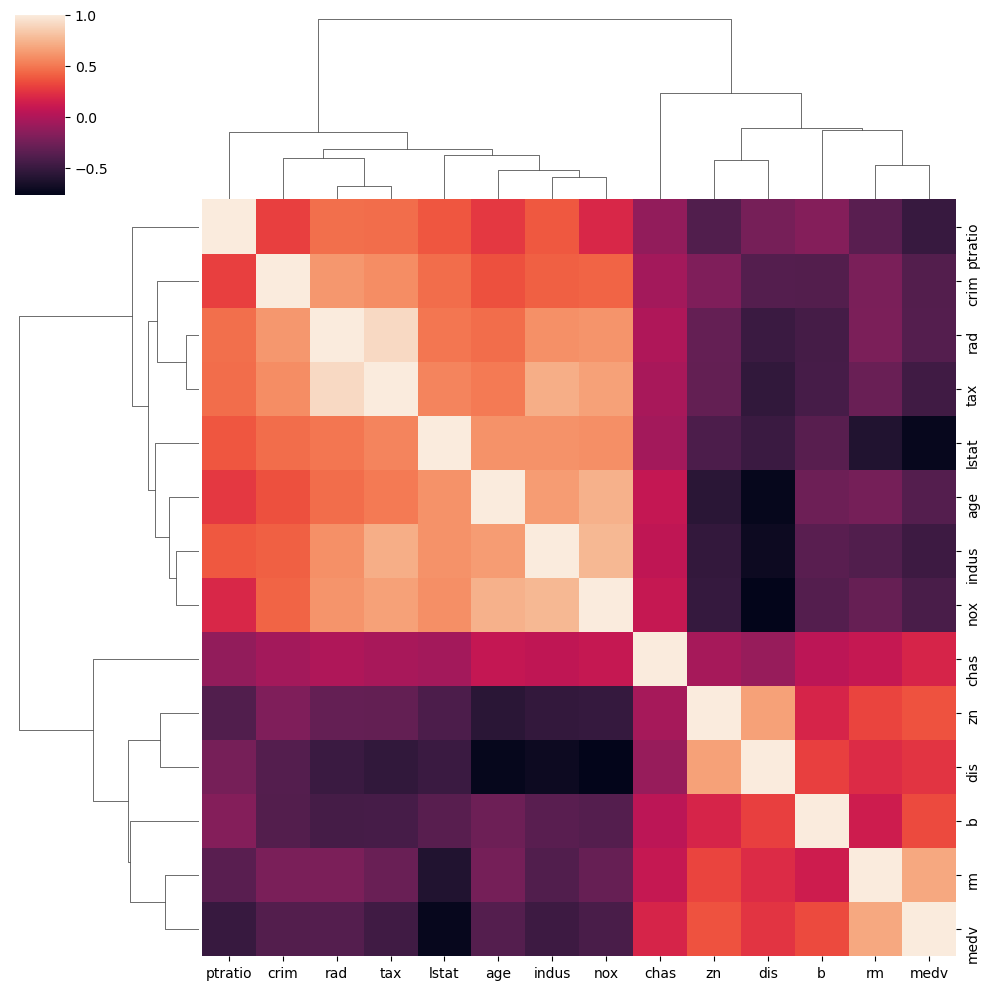

In [67]:
sns.clustermap(data.corr())

Here we can see, that a number of features are correlated to target -**medv** (which is good), and  a number of features are correlated between themselves (which is not so good). Still, we have to do full linear model first.

## 1.2 Data standartization and model

Even though **chas** is a categorical feature, we will standartize it too in order to fit same range as other features (I found online pros and cons for it). 

In [68]:
features, target = data.iloc[:,:-1], data['medv']
means = features.mean(axis=0)
stds = features.std(axis=0)

features = (features - means) / stds

X = sm.add_constant(features)
model = sm.OLS(target, X)
prediction = model.fit()

print(prediction.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        00:35:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

# 2. Testing linear regression asumptions
## 2.1 Linearity

In [69]:
target_pred = prediction.get_prediction(X).predicted_mean

/root/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Prediction')

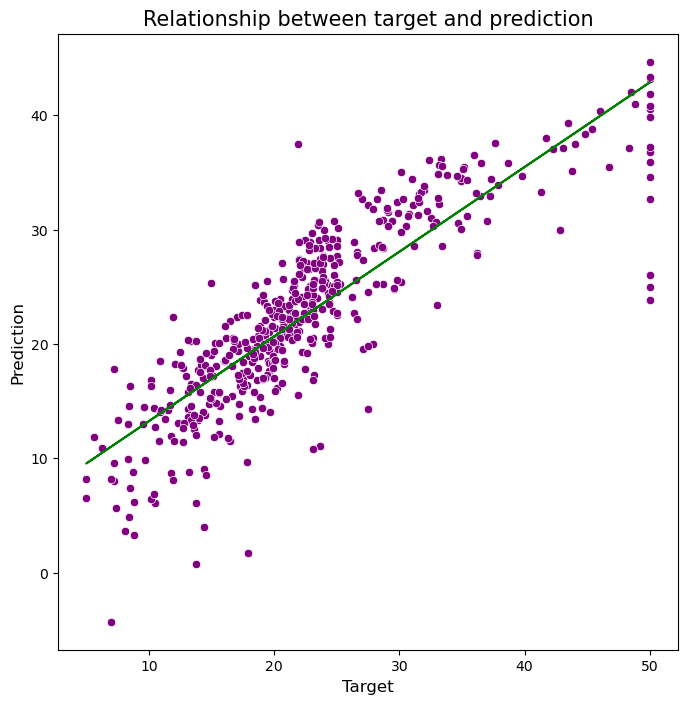

In [70]:
slope, intercept = np.polyfit(target, target_pred, 1)
best_line = slope * target + intercept
plt.figure(figsize=(8,8))
sns.scatterplot(target, target_pred, color='purple')
plt.plot(target, best_line, color='green')
plt.title('Relationship between target and prediction', size=15)
plt.xlabel('Target', size=12)
plt.ylabel('Prediction', size=12)

Here we can see - linearity isn't perfect. Also there is an abnormal number of 50K-priced houses. It looks like aggregation of houses that are priced >=50K. This houses can be dropped for model optimization

## 2.2 No outliers

Let's see, if model is affected by too impactfull otliers. We will use Cook's Distance

In [71]:
influence = prediction.get_influence()
cooks = influence.cooks_distance
print((cooks[1] < 0.05).sum())
print(sorted(cooks[1])[:10])

0
[0.9997830066967313, 0.9999935560612636, 0.9999991052094946, 0.9999992791128146, 0.9999998021343846, 0.9999998979450887, 0.9999999467510096, 0.9999999556244925, 0.999999963538251, 0.999999965598541]


It looks like there are no significant outliers.

## 2.3 No multicollinearity

To measure severity of multicollinearity, we will use variance inflation factor (VIF).

In [72]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
    return vif_data

In [73]:
calculate_vif(X)

,feature,VIF
0,const,1.000000
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


Here we can see, that two features have VIF>5, so drop of at least one of them can improve interpretability. Though, some sources imply that any VIF under 10 is still all-right.

## 2.4 Homoscedasticity 

/root/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


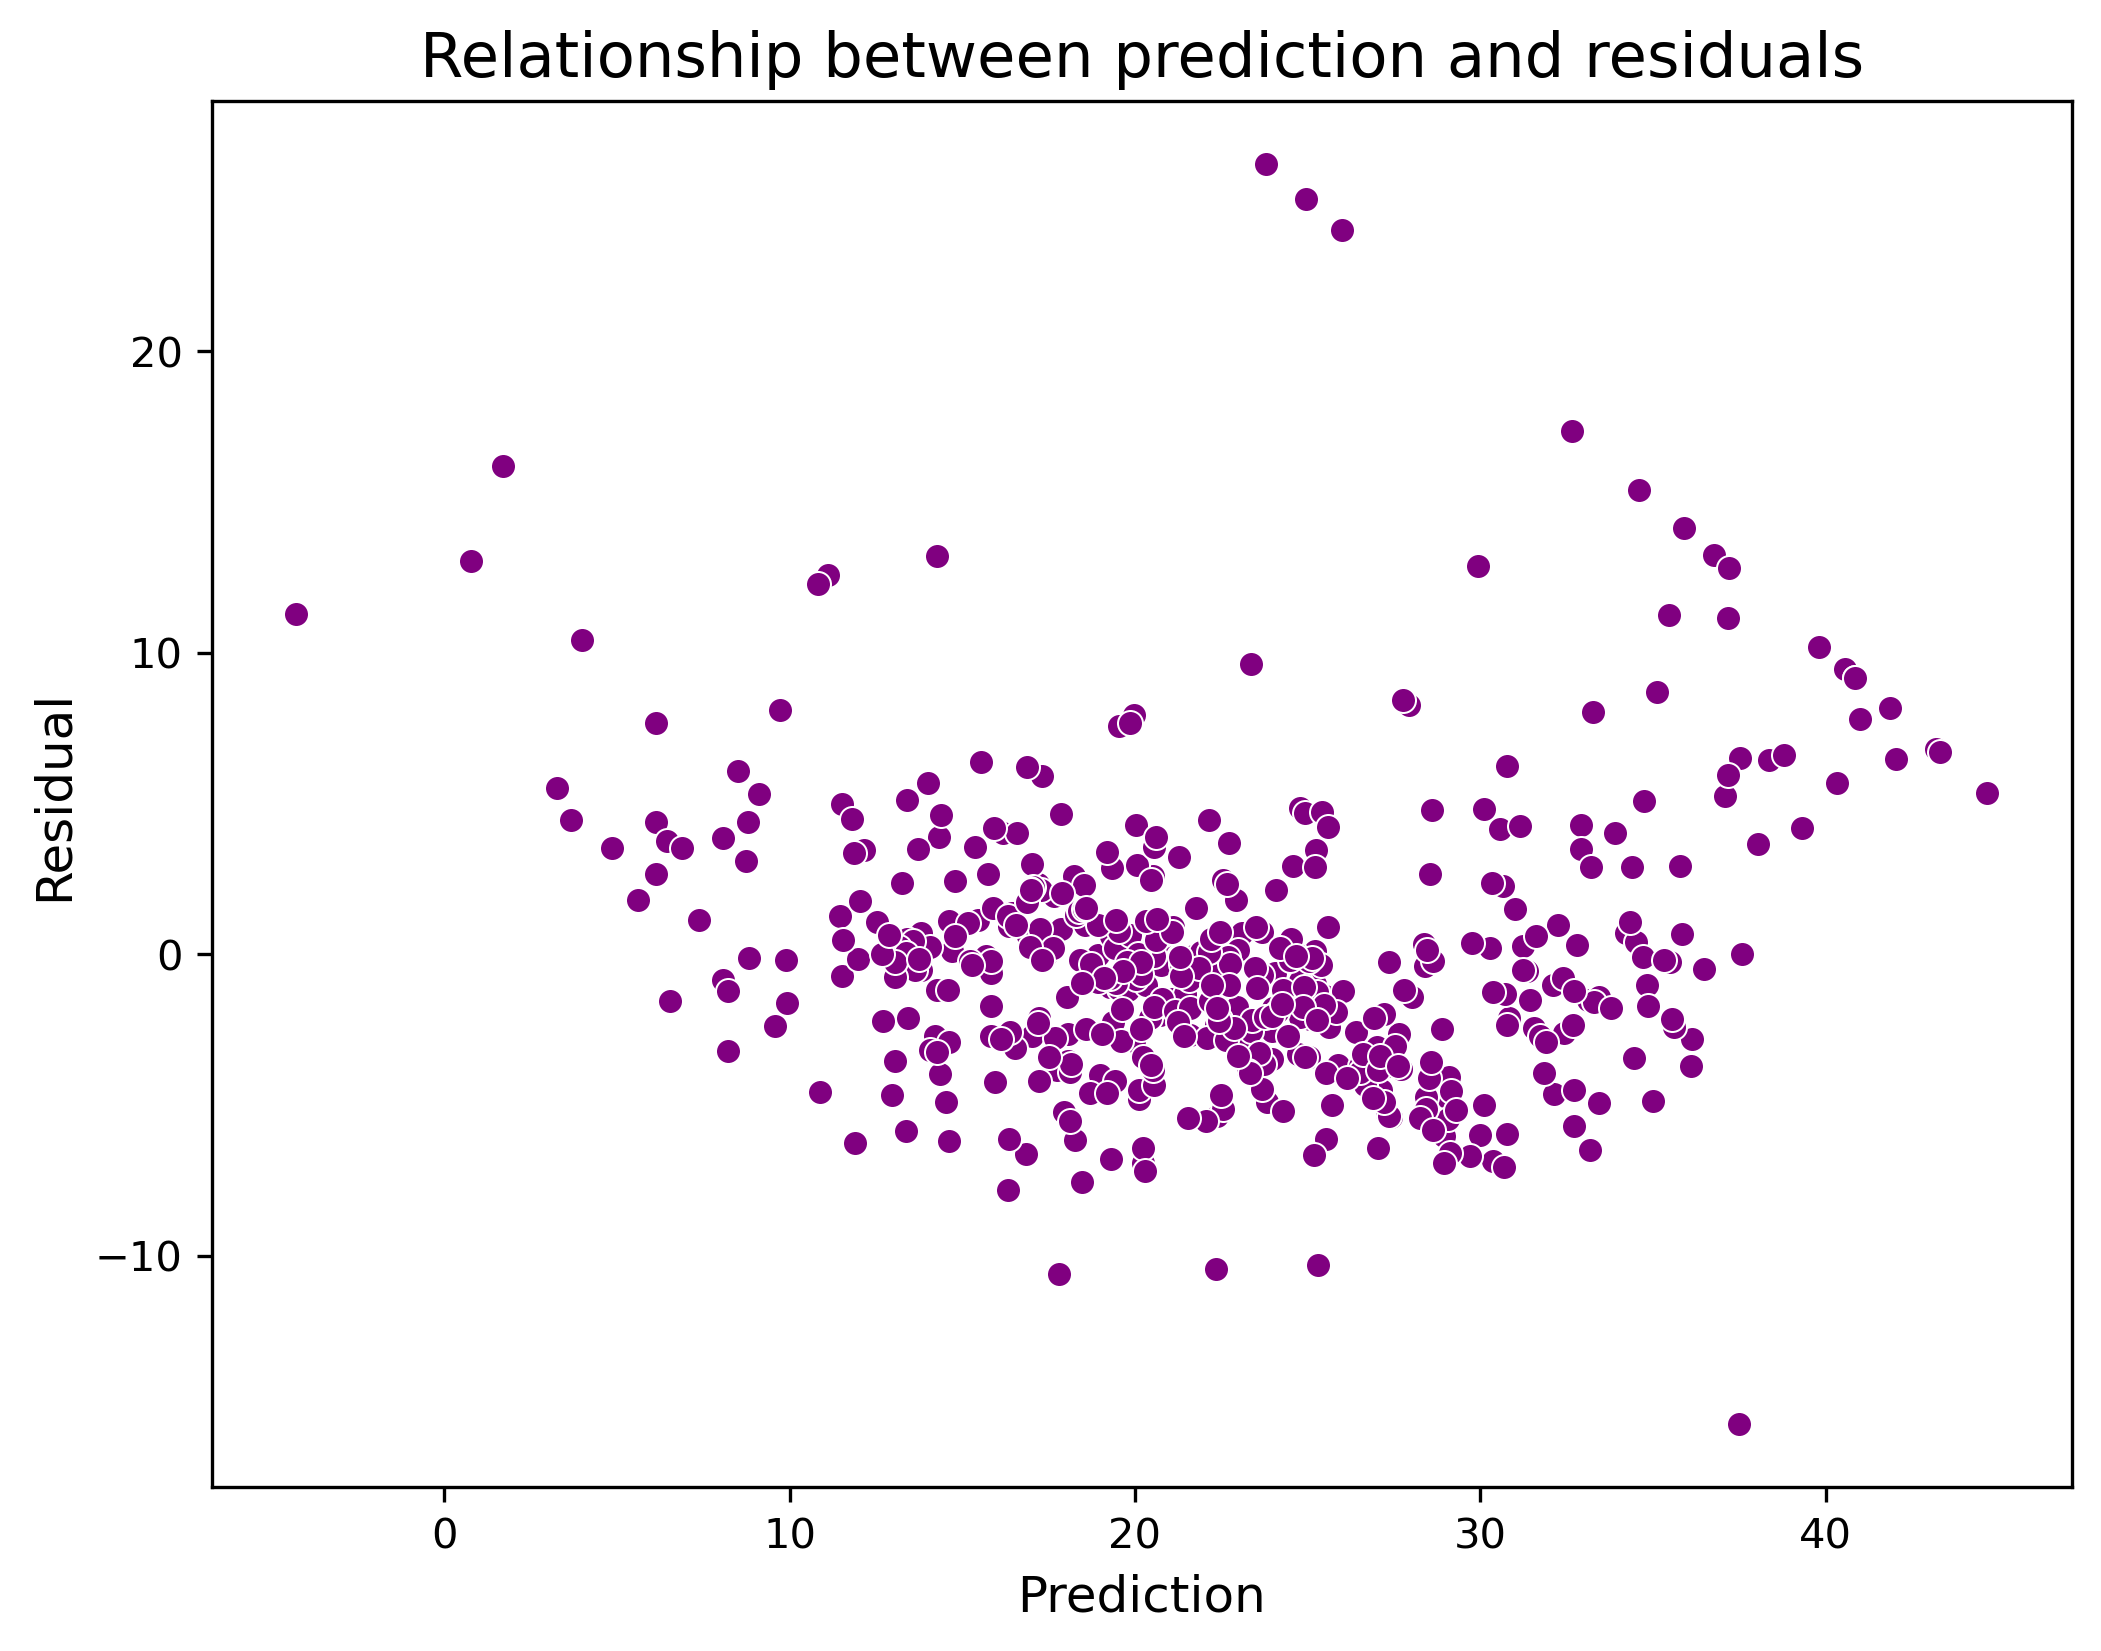

In [74]:
resids = target - target_pred
plt.figure(figsize=(8,6), dpi=300)
sns.scatterplot(target_pred, resids, color='purple')
plt.title('Relationship between prediction and residuals', size=15)
plt.xlabel("Prediction", size=12)
plt.ylabel("Residual", size=12);

Possibly it would look like homoscedasticity if not the houses priced 50k.

## 2.5 Distribution of residuals

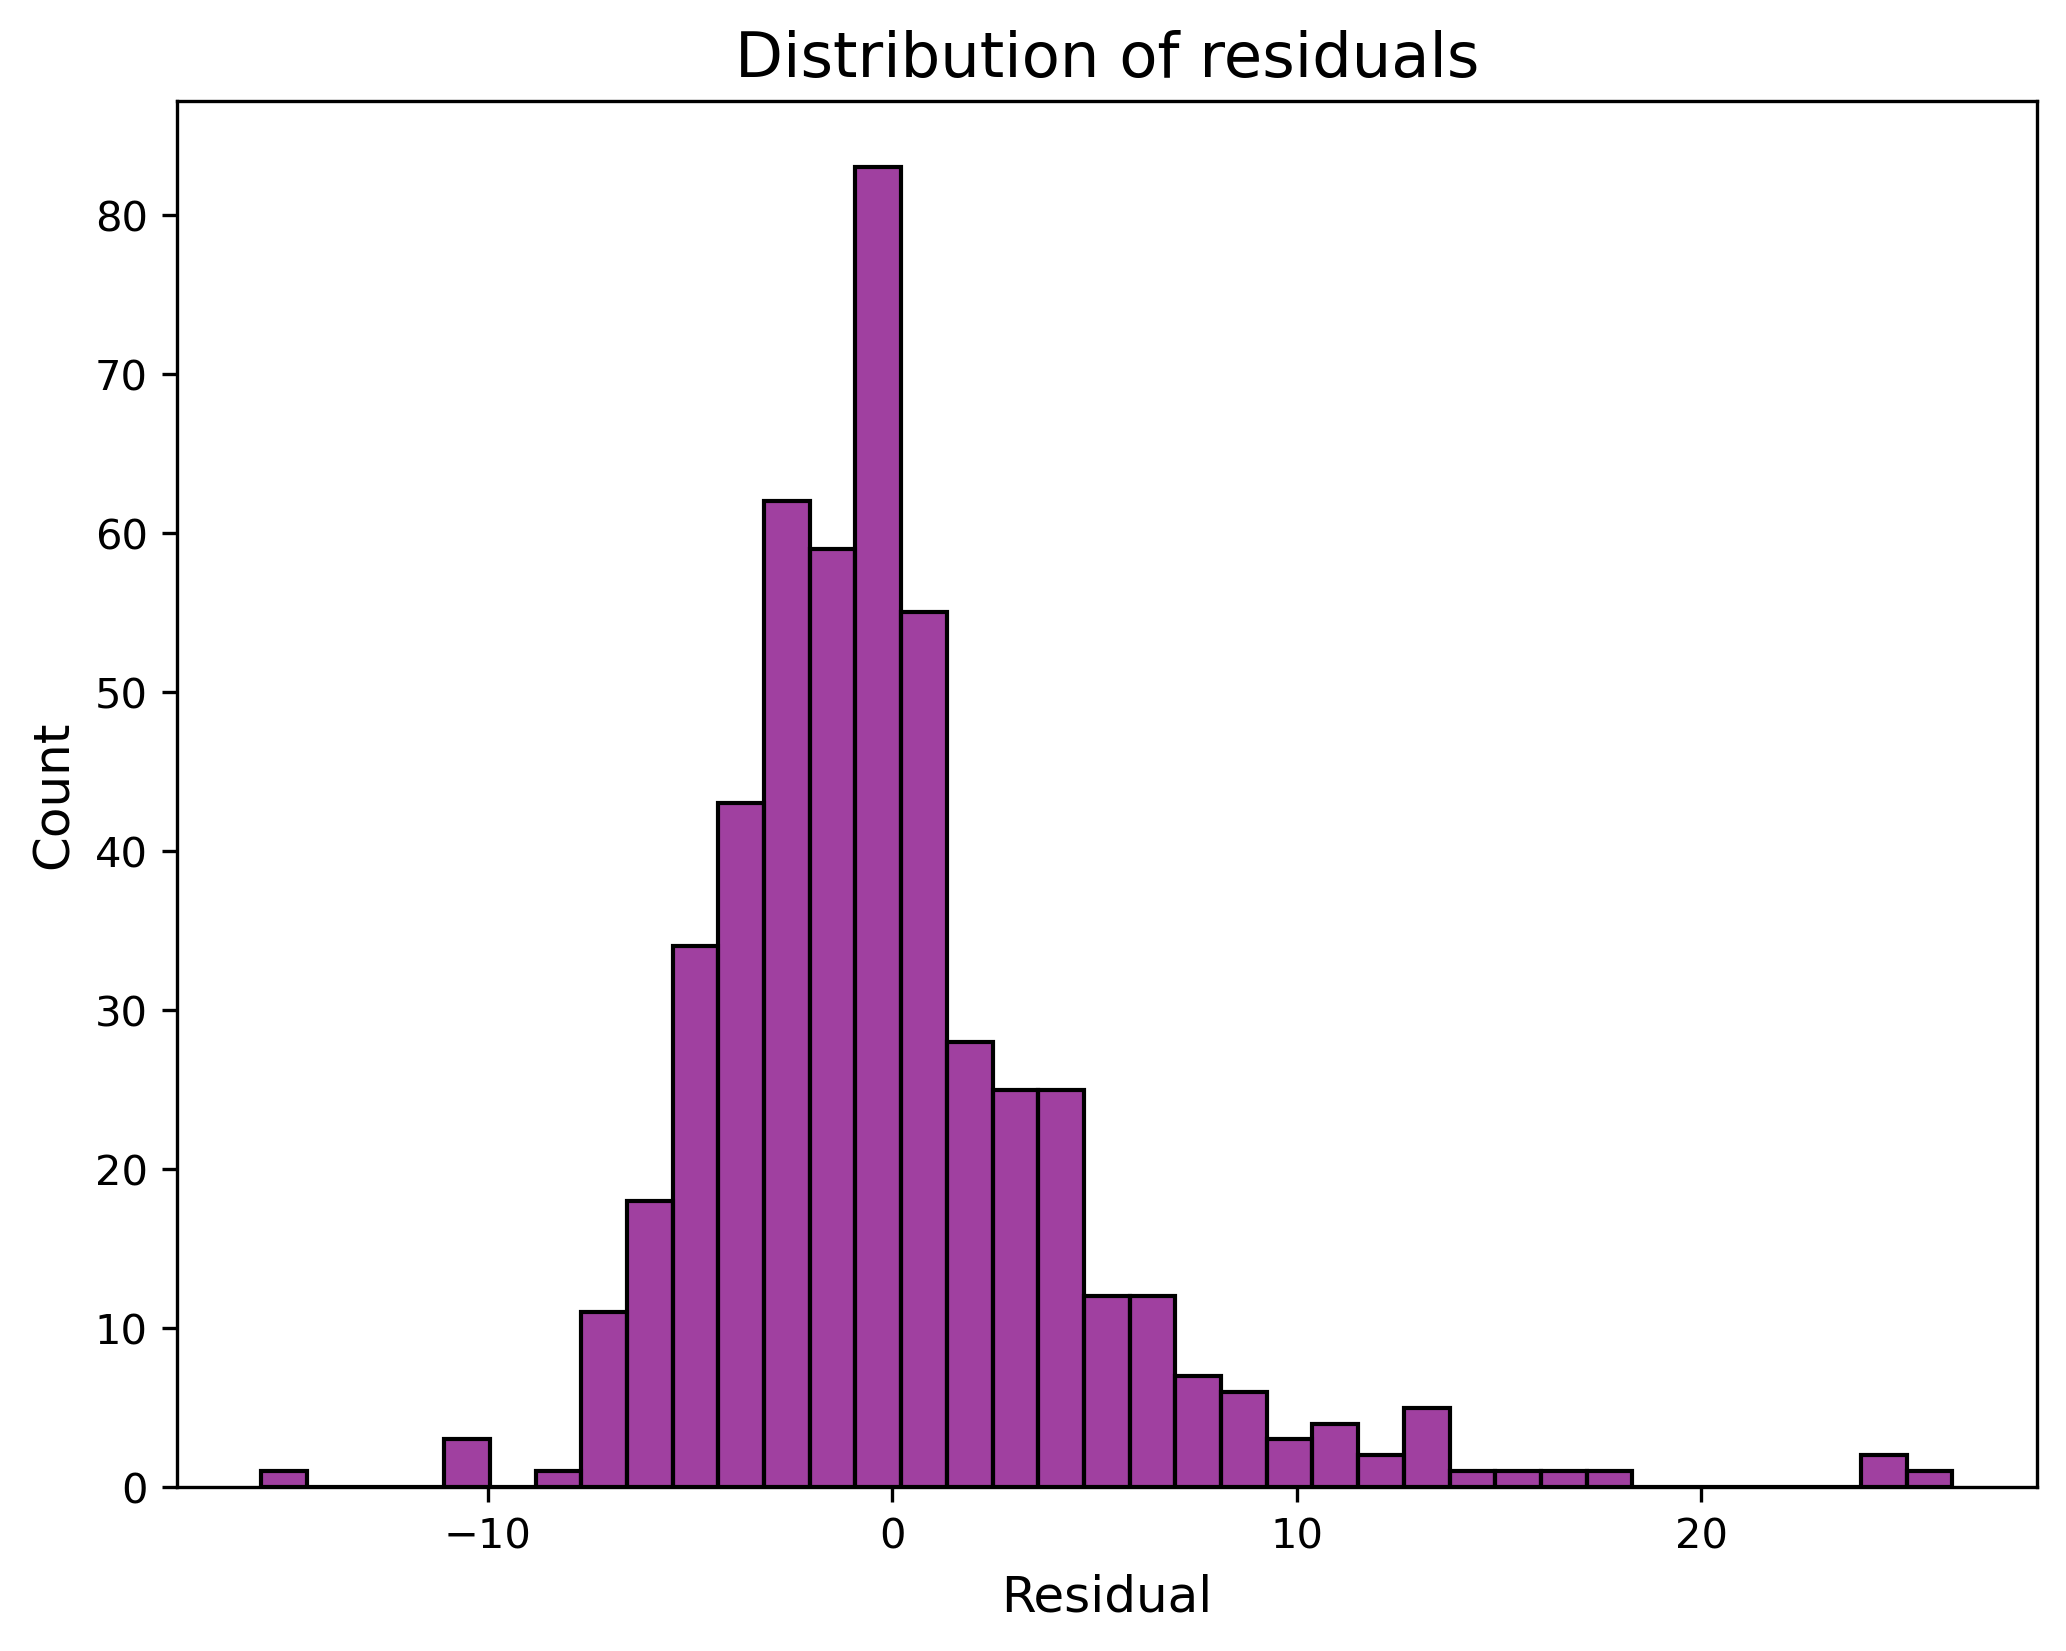

In [75]:
plt.figure(figsize=(8,6), dpi=300)
sns.histplot(resids, color='purple')
plt.title('Distribution of residuals', size=15)
plt.xlabel("Residual", size=12)
plt.ylabel("Count", size=12);

Text(0.5, 1.0, 'Distribution of residuals')

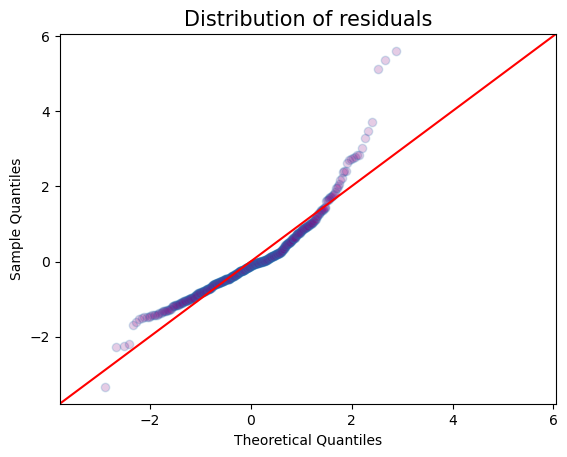

In [76]:
sm.qqplot(resids, fit=True, line ='45', markerfacecolor='purple', alpha=0.2)
plt.title('Distribution of residuals', size=15)

We can see that distribution of residuals is not so normal. Distribution is somewhat skewed. Effect of 50k houses is seen to.

## 2.6 Relationship between most significant feature and prediction

From the data above and figure below we can see that the most significant factor with abs coefficient around 3.7 is lstat - share of low status population.

/root/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


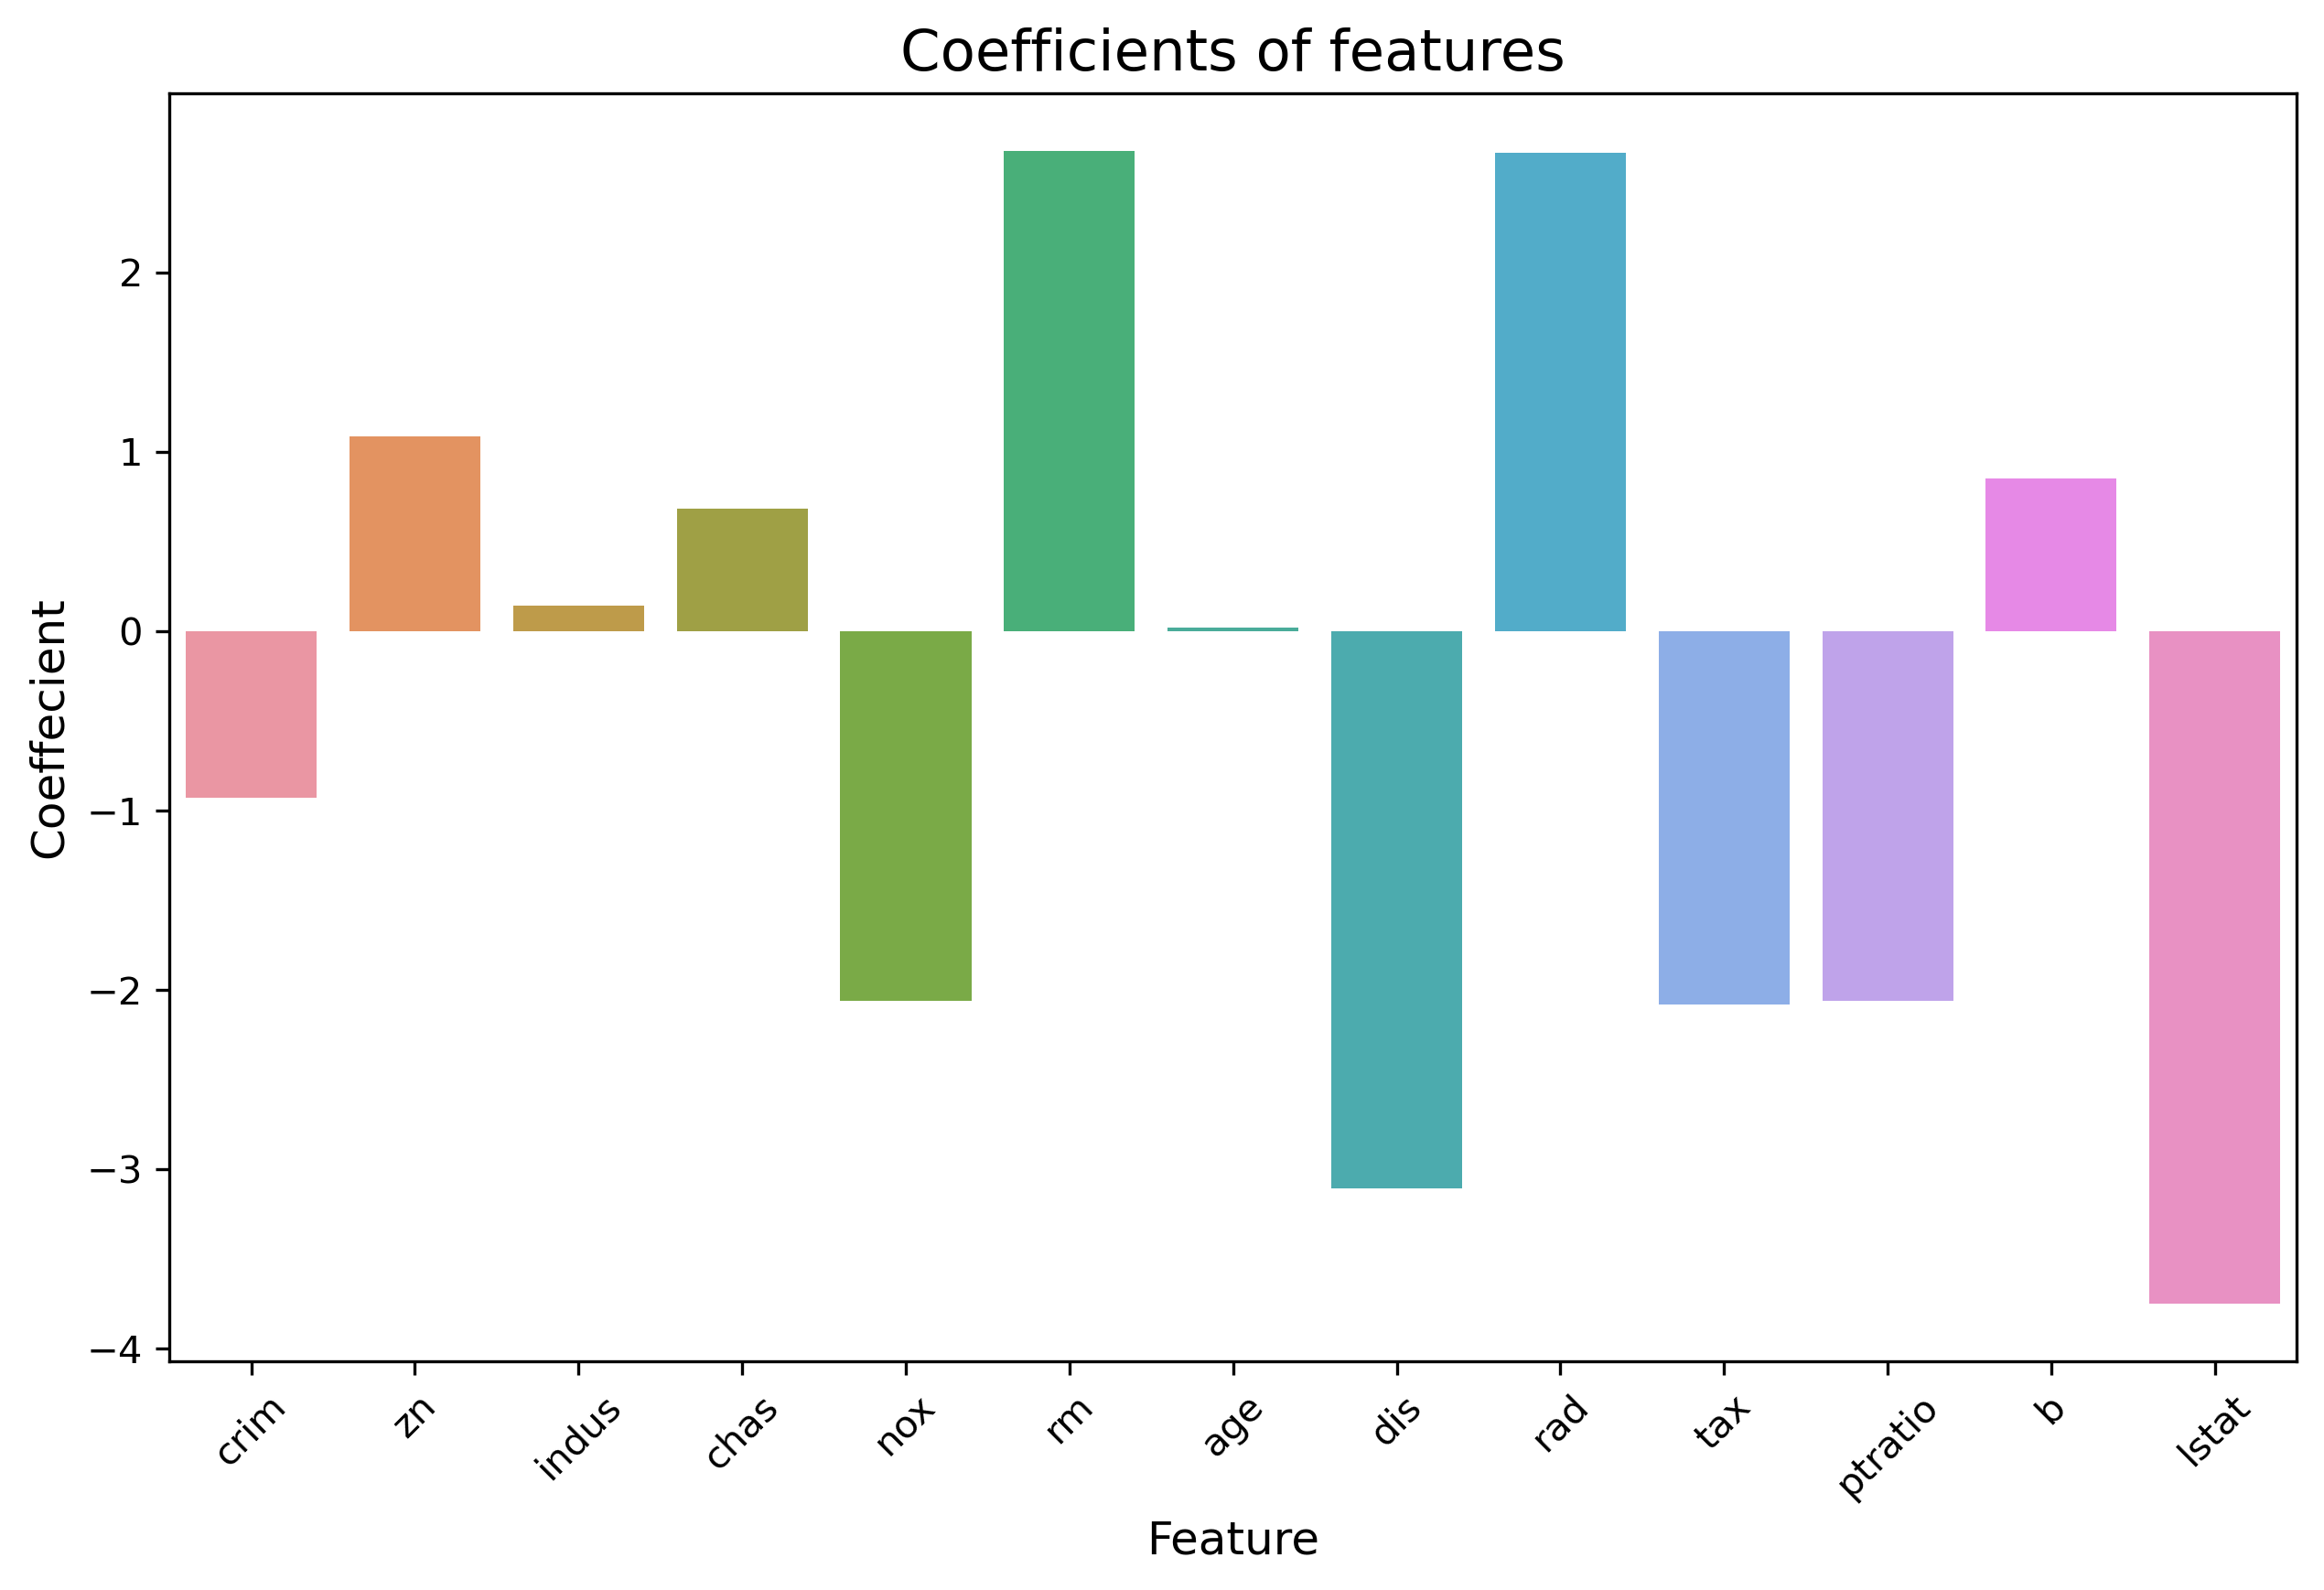

In [77]:
plt.figure(figsize=(10,6), dpi=300)
sns.barplot(prediction.params.index.drop('const'), prediction.params.drop('const'))
plt.xticks(rotation=45)
plt.title('Coefficients of features', size=15)
plt.xlabel("Feature", size=12)
plt.ylabel("Coeffecient", size=12);

/root/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


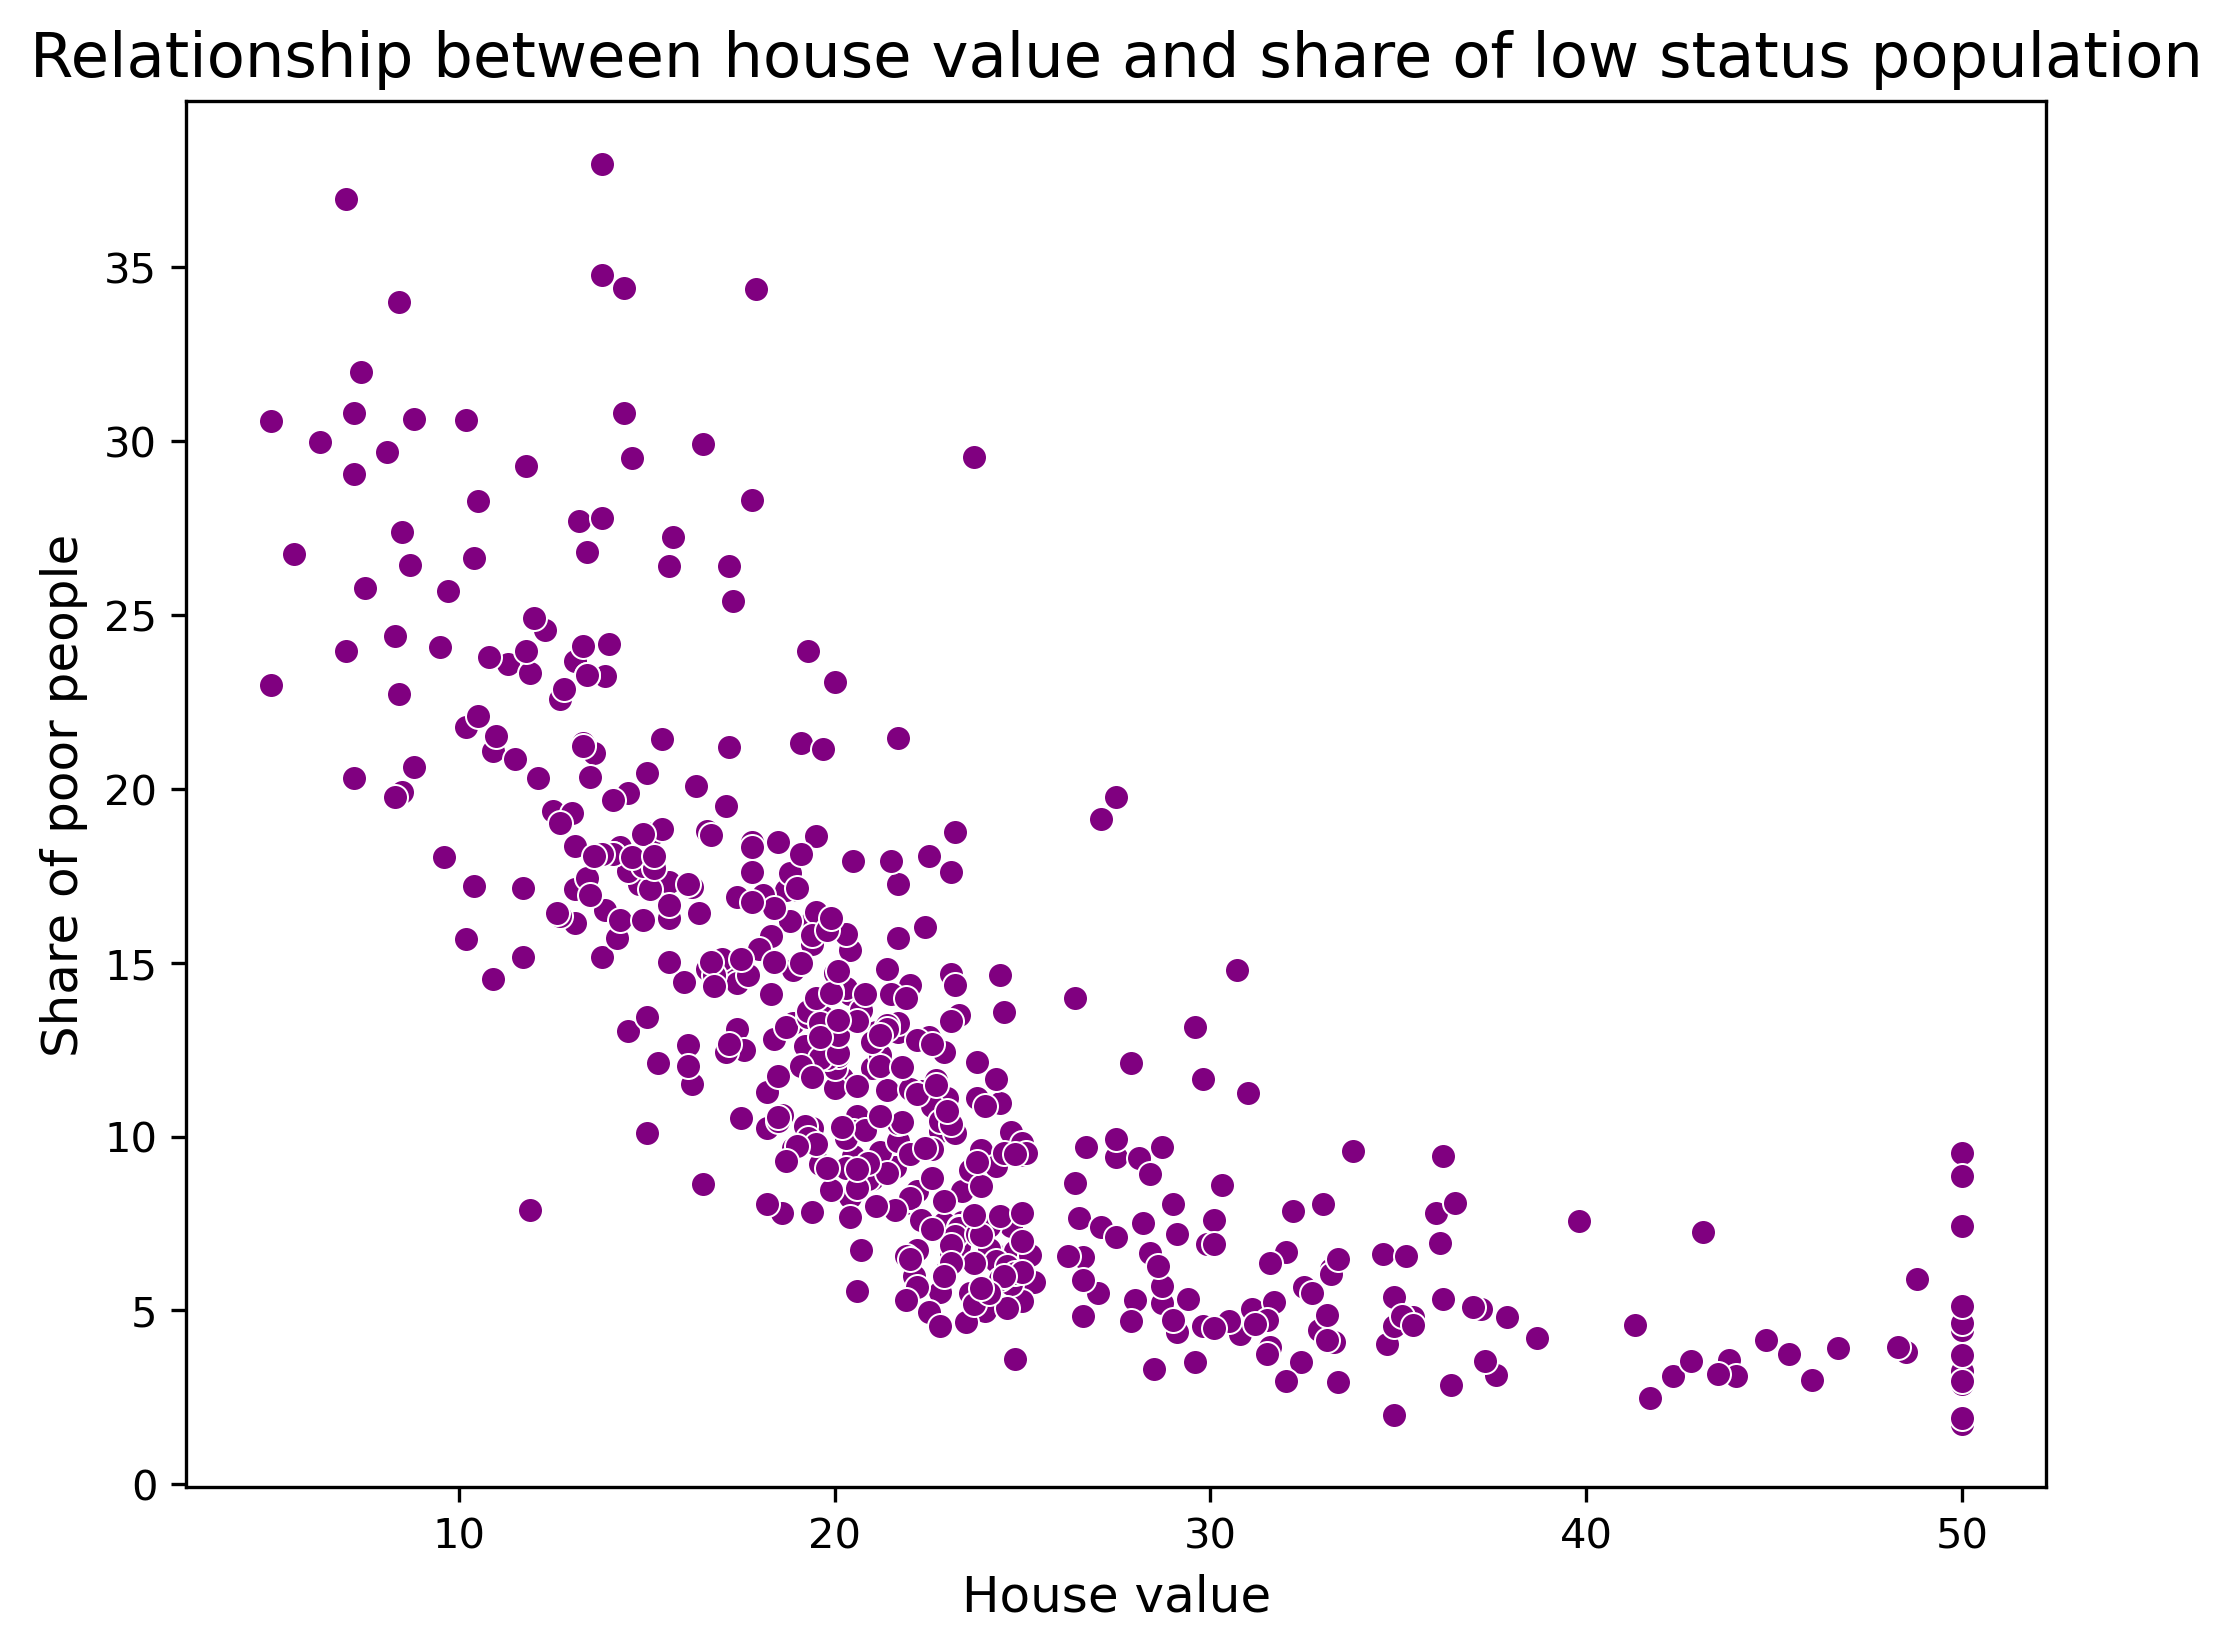

In [78]:
plt.figure(figsize=(8, 6), dpi=300)
sns.scatterplot(target, data.iloc[:,:-1]['lstat'], color='purple')
# sns.histplot(resids, color='purple')
plt.title('Relationship between house value and share of low status population',
          size=15)
plt.xlabel("House value", size=12)
plt.ylabel("Share of poor people", size=12);

We can see that correlation is strong but not quite linear. As share of low status pop is low, other factors more significantly impact on house value.

## 3.1 Improve model interpretability  
In order to improve interpretability of model we will try 2 things:

- drop 50k-price houses;
- drop features with high collinearity - VIF over 5

In [79]:
new_target = target[target < 50]
new_features = data.iloc[:,:-1][target < 50]

means = new_features.mean(axis=0)
stds = new_features.std(axis=0)

new_features = (new_features - means) / stds

X = sm.add_constant(new_features)
model = sm.OLS(new_target, X)
prediction = model.fit()
print(prediction.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     128.1
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          4.33e-146
Time:                        00:36:29   Log-Likelihood:                -1337.0
No. Observations:                 490   AIC:                             2702.
Df Residuals:                     476   BIC:                             2761.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6359      0.170    127.408      0.0

We can see that R-squared of model has improved and lstat has became less influential.


Lets try to reduce collinearity.

In [80]:
calculate_vif(X)

,feature,VIF
0,const,1.000000
1,crim,1.794459
2,zn,2.293841
3,indus,3.995187
4,chas,1.062154
5,nox,4.402973
6,rm,1.885332
7,age,3.114563
8,dis,3.976105
9,rad,7.366036


In [81]:
calculate_vif(X.drop(columns=["tax"]))

,feature,VIF
0,const,1.000000
1,crim,1.794021
2,zn,2.171348
3,indus,3.308960
4,chas,1.042171
5,nox,4.374604
6,rm,1.877691
7,age,3.113664
8,dis,3.975907
9,rad,2.851145


Drop of tax feature - the most correlated with other features - puts all VIFs below 5, which is considered good enough.

In [82]:
model_updated = sm.OLS(new_target, X.drop(columns=["tax"]))
prediction_updated = model_updated.fit()

print(prediction_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     131.4
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          1.05e-142
Time:                        00:36:37   Log-Likelihood:                -1347.6
No. Observations:                 490   AIC:                             2721.
Df Residuals:                     477   BIC:                             2776.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6359      0.173    124.805      0.0

/root/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Prediction')

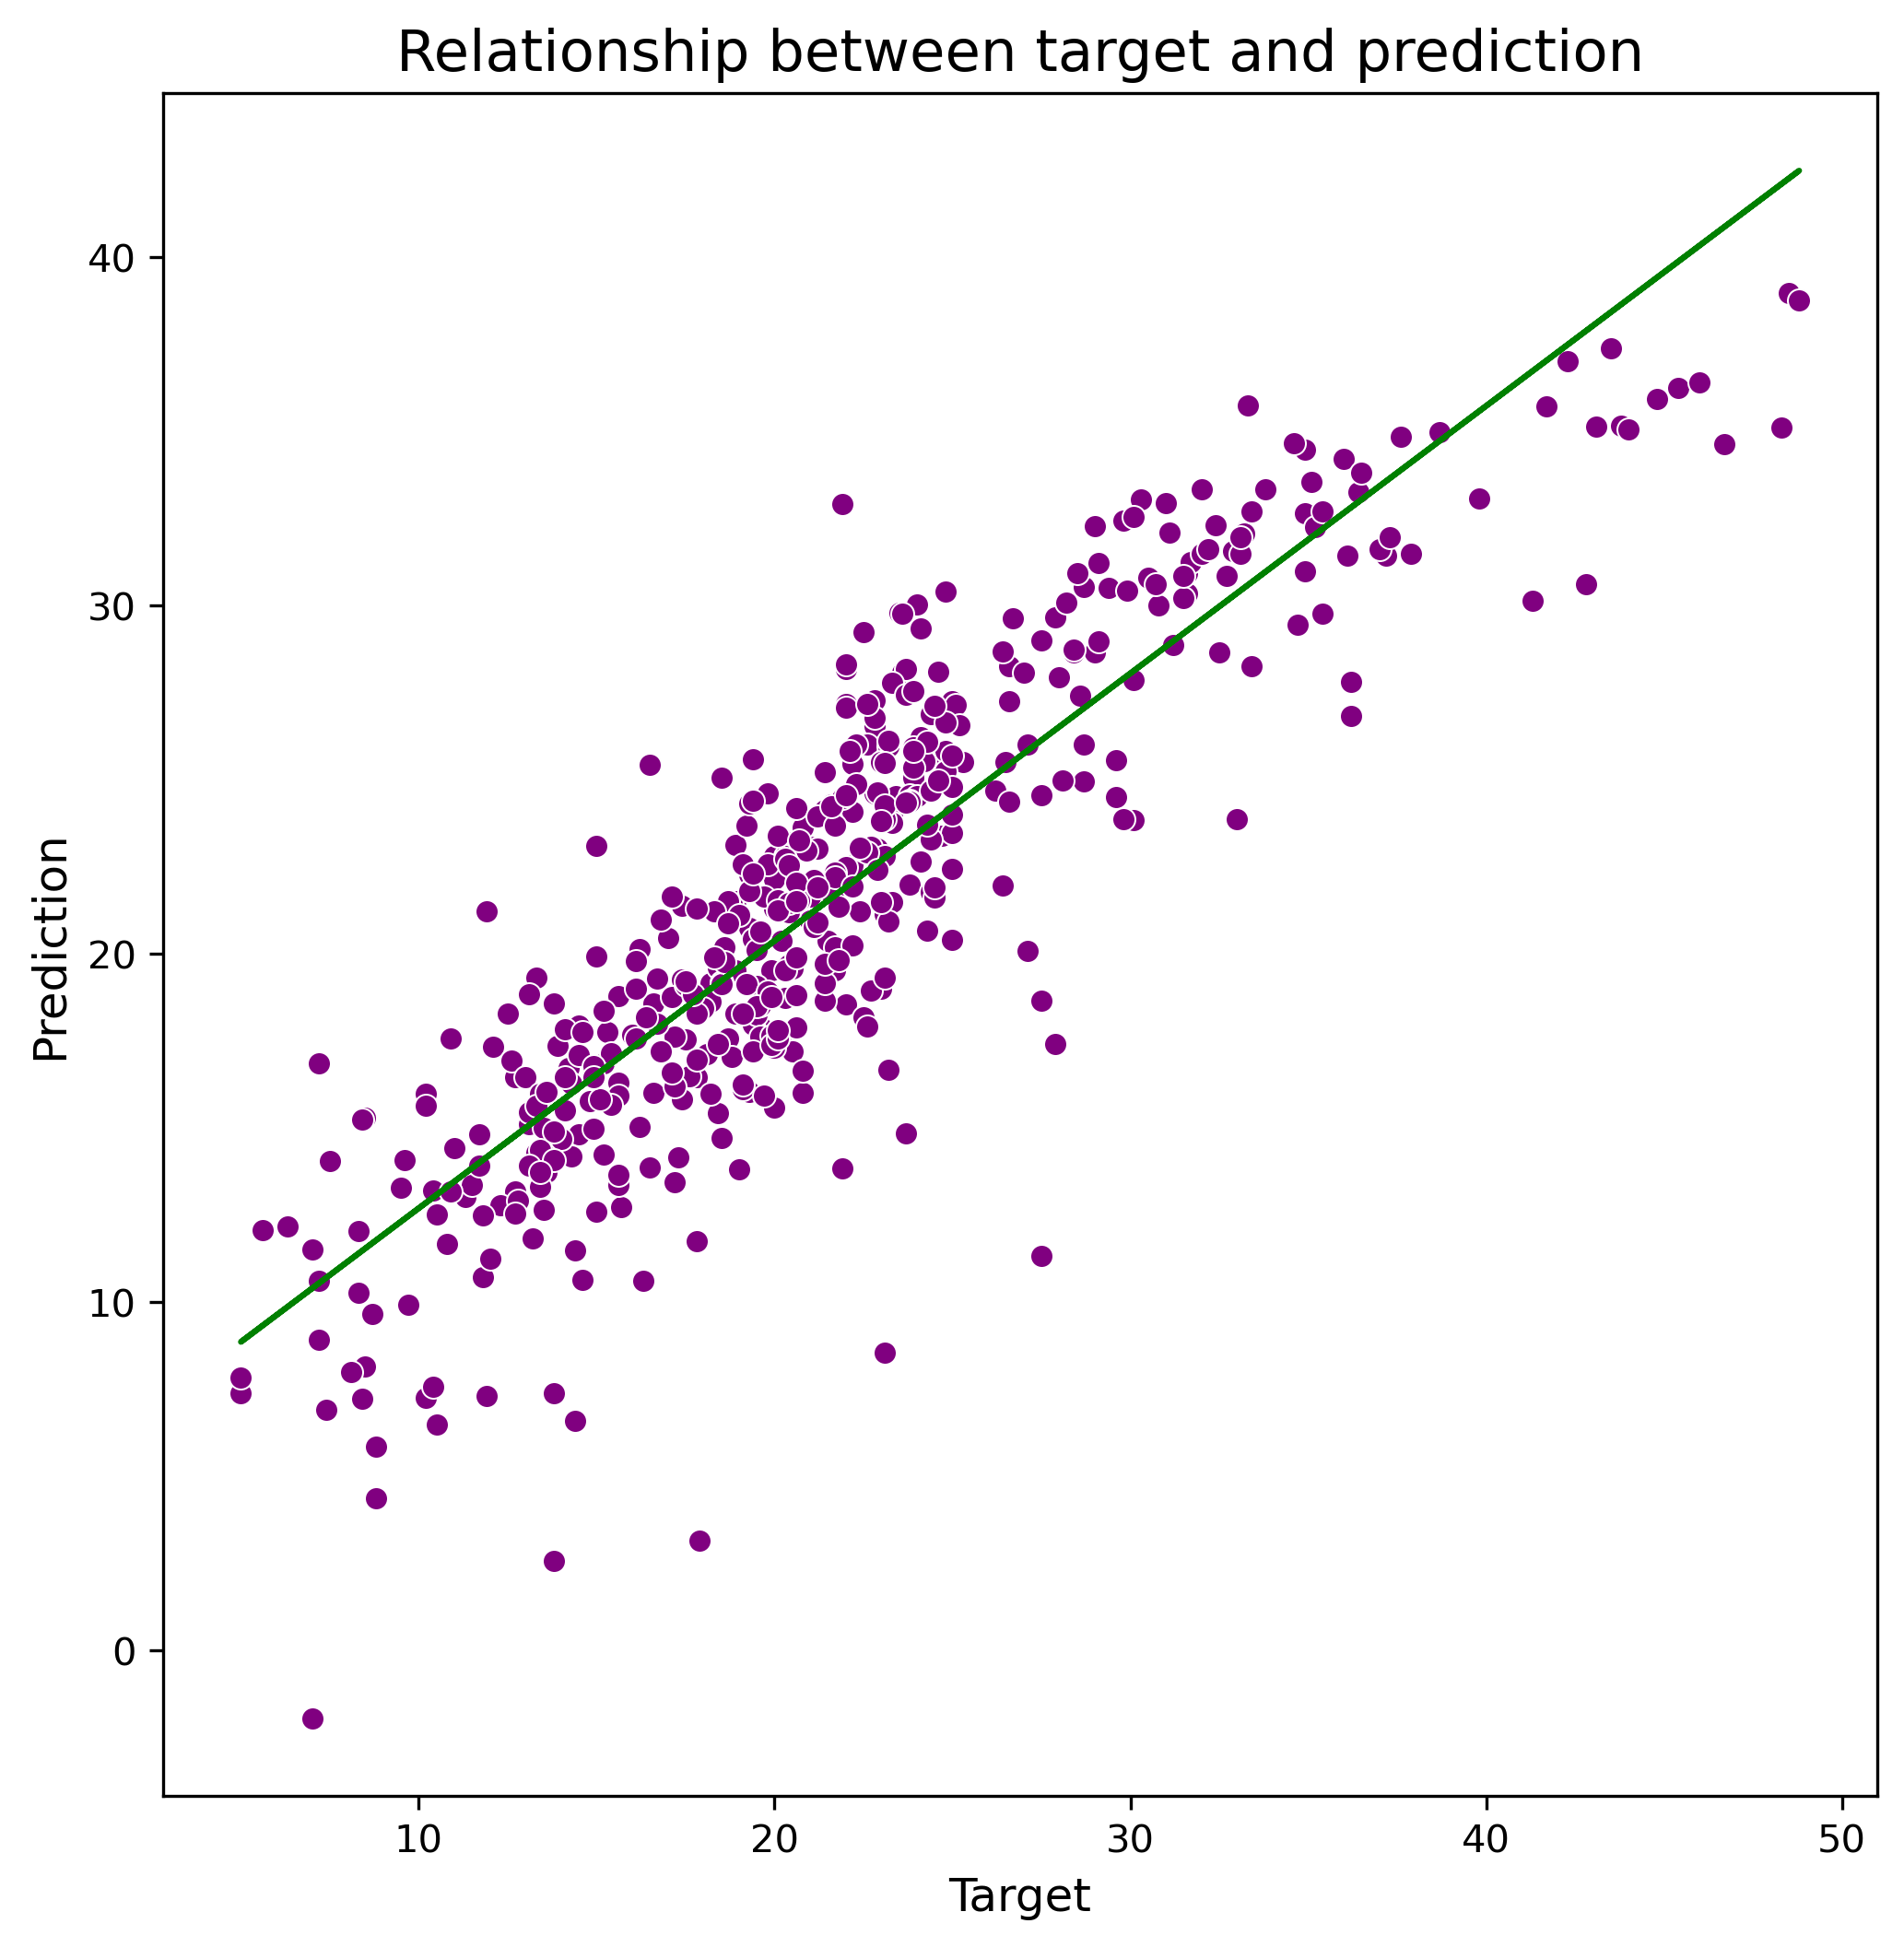

In [83]:
target_pred = prediction_updated.get_prediction(X.drop(
    columns=["tax"])).predicted_mean
slope, intercept = np.polyfit(new_target, target_pred, 1)
best_line = slope * new_target + intercept
plt.figure(figsize=(8,8), dpi=300)
sns.scatterplot(new_target, target_pred, color='purple')
plt.plot(new_target, best_line, color='green')
plt.title('Relationship between target and prediction', size=15)
plt.xlabel('Target', size=12)
plt.ylabel('Prediction', size=12)

In [84]:
influence = prediction_updated.get_influence()
cooks = influence.cooks_distance
print((cooks[1] < 0.05).sum())
print(sorted(cooks[1])[:10])

0
[0.9989835417685728, 0.999936098788618, 0.9999975310590496, 0.9999979301618303, 0.9999995816829997, 0.9999999471940251, 0.9999999544843174, 0.999999957677806, 0.9999999926018539, 0.9999999931262534]


/root/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


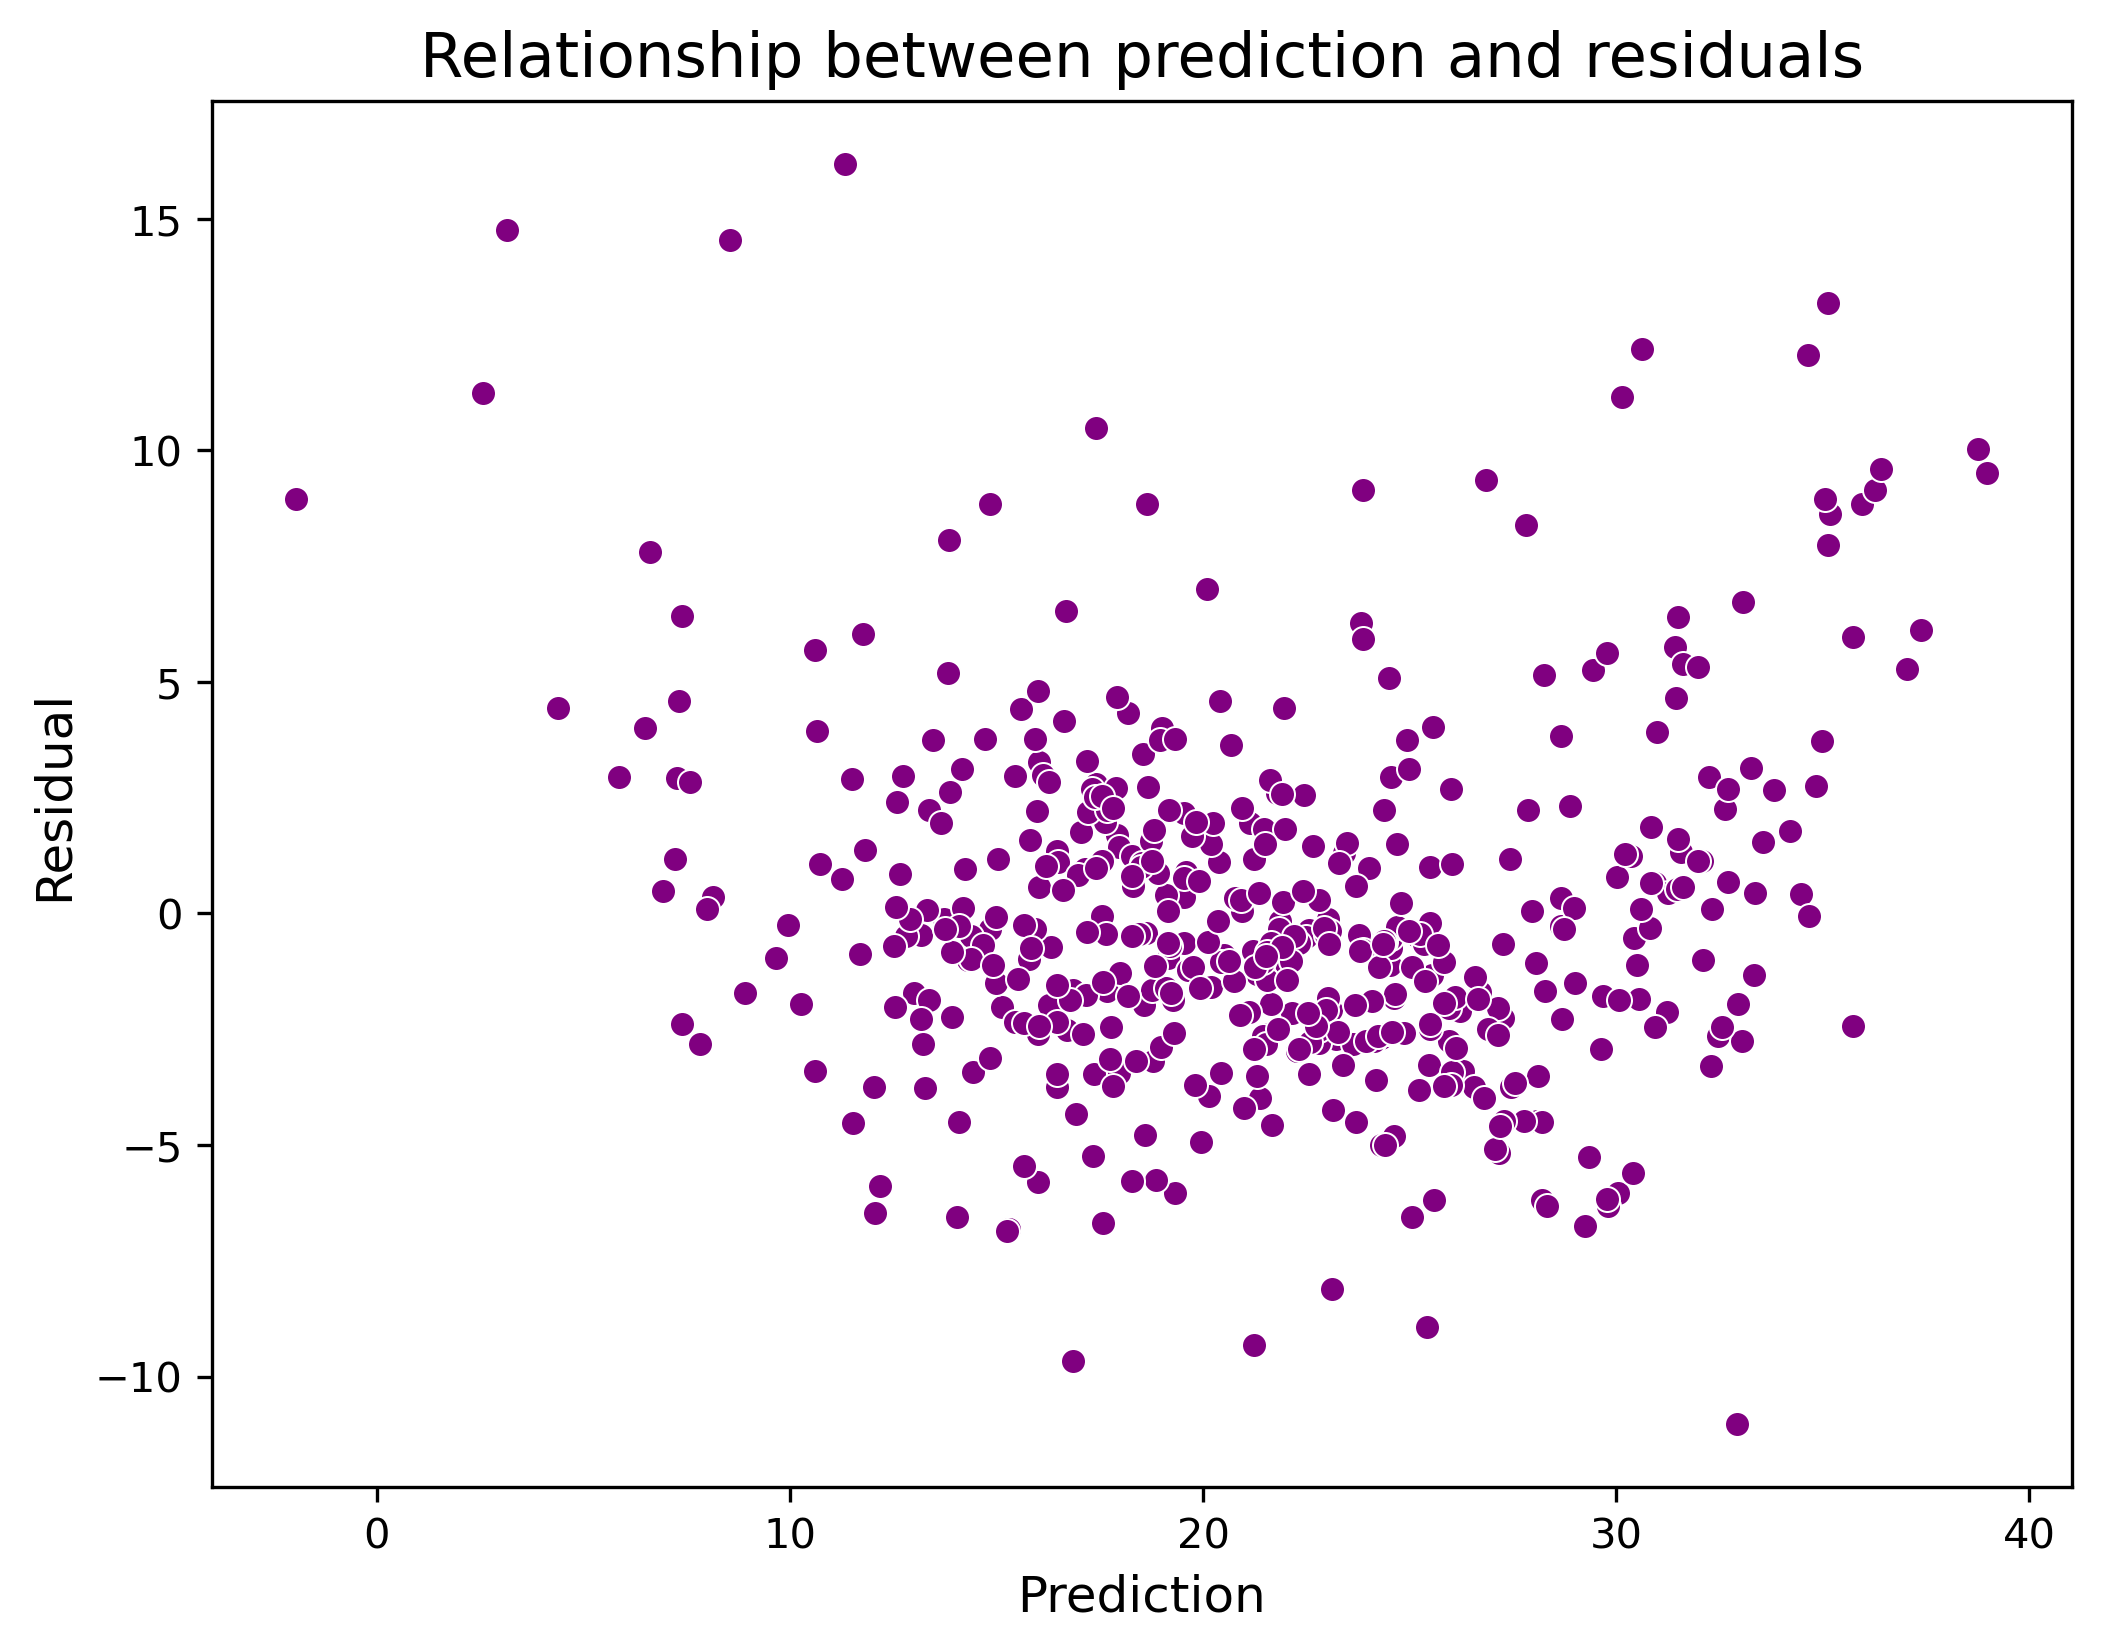

In [85]:
resids = new_target - target_pred
plt.figure(figsize=(8,6), dpi=300)
sns.scatterplot(target_pred, resids, color='purple')
plt.title('Relationship between prediction and residuals', size=15)
plt.xlabel("Prediction", size=12)
plt.ylabel("Residual", size=12);

Text(0, 0.5, 'Count')

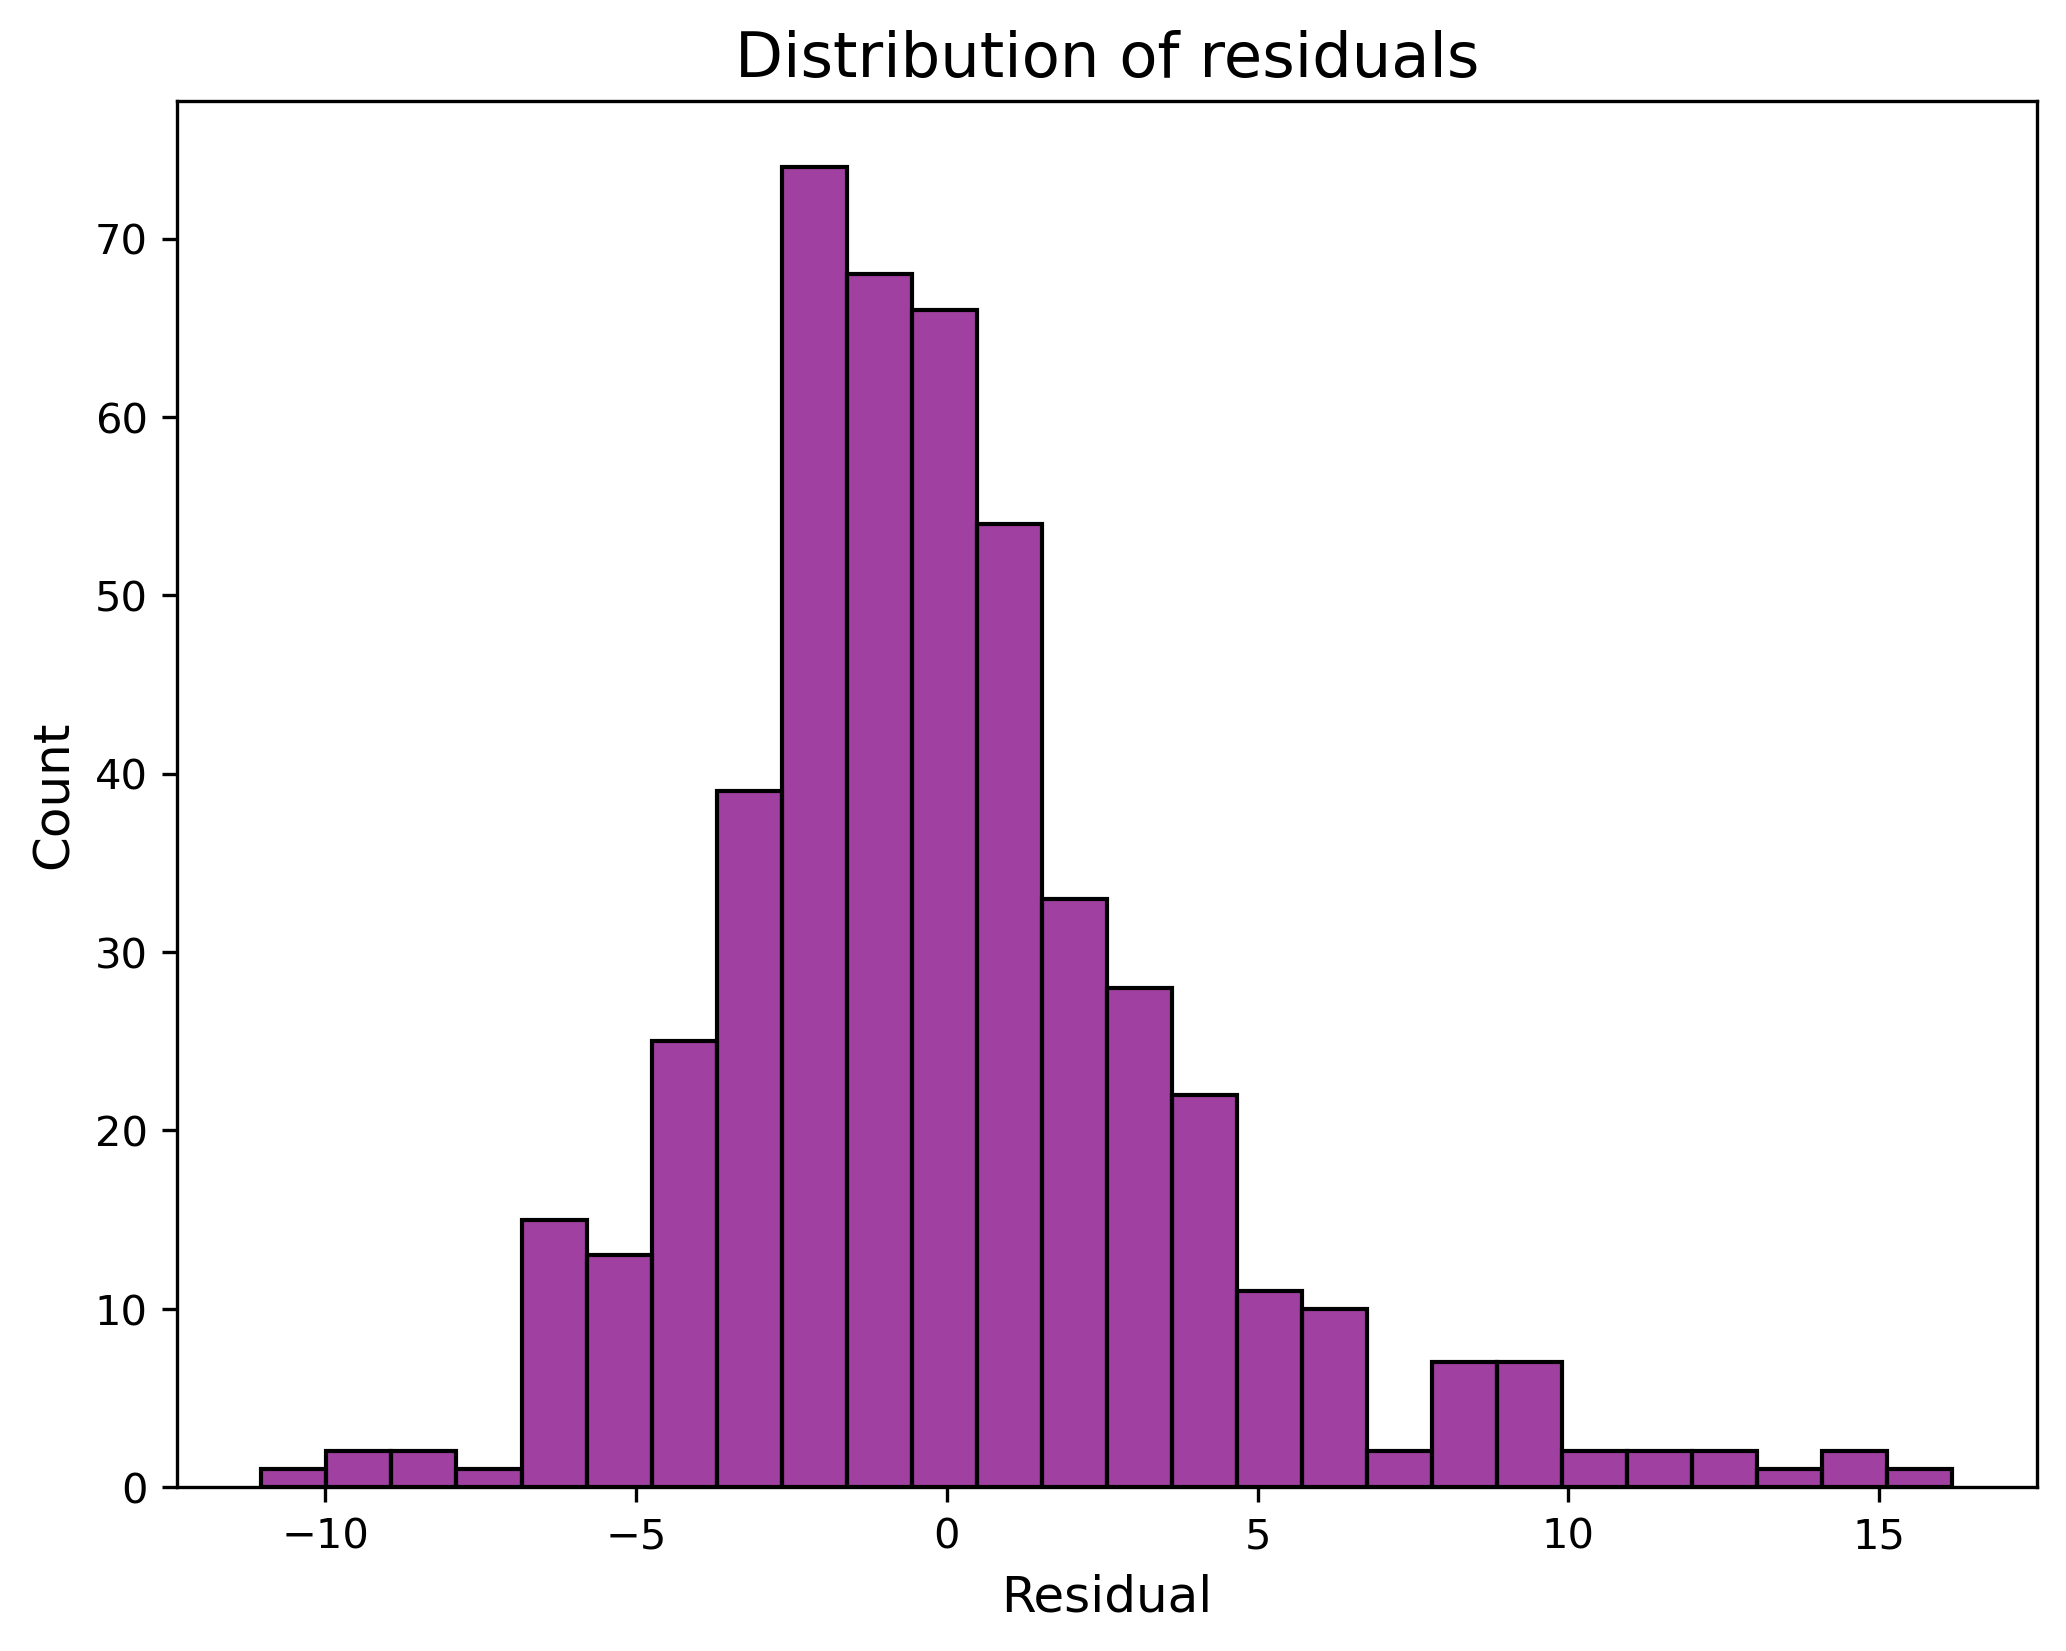

In [87]:
plt.figure(figsize=(8,6), dpi=300)
sns.histplot(resids, color='purple')
plt.title('Distribution of residuals', size=15)
plt.xlabel("Residual", size=12)
plt.ylabel("Count", size=12)

Text(0.5, 1.0, 'Distribution of residuals')

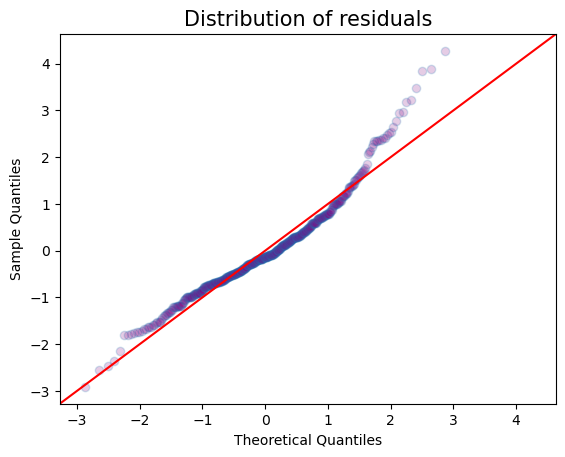

In [88]:
sm.qqplot(resids, fit=True, line ='45', markerfacecolor='purple', alpha=0.2)
plt.title('Distribution of residuals', size=15)

Well, not sure if assumptions are met better now. At least, not worser :)  
Let's look at coefficients of features again.

In [89]:
params = prediction_updated.params
params.sort_values(ascending=False,key=abs)

const      21.635918
dis        -2.566041
rm          2.523748
lstat      -2.485855
ptratio    -1.849832
nox        -1.578251
indus      -0.946302
crim       -0.914447
b           0.752724
age        -0.690328
zn          0.533381
rad         0.524672
chas        0.217217
dtype: float64

Here are coefficients of different features sorted by abs value. Const - intercept.

There are three the most significant features - dis, rm and lstat, closely followed by quite significant ptratio and nox.
So, our recommendations for entrepreneur are:

- **build as close as possible to the employment centers of the city (dis)**;

- **build in the towns with larger houses with higher average room count (rm)**;

- **avoid towns with high share of low status population. The lower, the beter. Or at least lower than 5% (lstat)**;

- build in towns with lower pupil-teacher ration, preferably lower than 17 (ptratio);

- build in areas with better air quality, with lower level of nitric oxide related to fuel combustion and car traffic (nox)

(В общем, стройте в элитном поселке на острове/в лесу близко к центру Москвы (Бостона), там где много деревьев и мало граждан.)